# 课前准备

> 本节课提前需要回顾决策树算法，以及随机森林在内的机器学习集成算法。

# 课堂主题

> 随机森林的Python代码实践；
> 辅以其他的集成算法（XGBoost/LightGBM）的Python代码实践。

# 课堂目标

> 本节课的目标是理解如何使用Python实现随机森林模型的训练与预测。

1. 理解Python做随机森林的步骤
2. 掌握使用Python做用户流失预测


# 算法概述

sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
 min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

## 参数解读

Bagging框架的参数和GBDT对比，GBDT的框架参数比较多，重要的有最大迭代器的个数，步长和子采样的比例等，调参过程比较费力。但是基于Bagging框架的随机森林则比较简单，这是因为Bagging的各个弱学习器之间是没有依赖关系的，降低了调参的难度。换句话说，达到同样的调参效果，随机森林调参时间要比GBDT少一些。

下面我们来看看随机森林的重要参数，由于Random Forest Classifier和Random Forest Regressor参数绝大部分相同，这里会将它们一起讲，不同点会指出。

  - n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的决策树个数，默认是10。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。

  - bootstrap：默认True，是否有放回的采样。
  
  
  - oob_score：默认识False，即是否采用袋外样本来评估模型的好坏。有放回采样中大约会有36.8%的数据没有被采样到，我们常常称之为袋外数据(Out Of Bag, 简称OOB)，这些数据没有参与到训练集模型的拟合，因此可以用来检测模型的泛化能力。推荐设置为True，因为袋外分数反应了模型拟合后的泛化能力。对单个模型的参数训练，我们知道可以用cross validation（cv）来进行，但是比较消耗时间，而且对于随机森林这种情况没有太大的必要，所以就用袋外数据对决策树模型进行验证，类似一个简单的交叉验证，性能消耗小，但是效果不错。
  
  
  - criterion：
 即CART树做划分时对特征的评价标准，分类模型和回归模型的损失函数是不一样的。
 
  （1）分类RF对应的CART分类树默认是基尼系数gini,另一个可选择的标准是信息增益entropy，是用来选择节点的最优特征和切分点的两个准则。

  （2）回归RF对应的CART回归树默认是均方差MSE，另一个可选择的标准是绝对值误差MAE。一般来说选择默认的标准就已经很好的。
  

  - max_features: 随机森林划分时考虑的最大特征数。可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；如果是"log2"意味着划分时最多考虑log2N个特征；如果是"sqrt"或者"auto"意味着划分时最多考虑N−−√N个特征。如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑（百分比xN）取整后的特征数，其中N为样本总特征数。一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。
  
  
  - max_depth:
决策树最大深度。默认为"None"，即不限制子树的深度。这样建树时，会使每一个叶节点只有一个类别，或是达到min_samples_split。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。


  - min_samples_split:
内部节点再划分所需的最小样本数，默认2。这个值限制了子树继续划分的条件，如果某节点的样本数小于min_samples_split，则不会继续划分。如果样本量不大，可以不设置这个值；如果样本量数量级非常大，则推荐增大这个值。


  - min_samples_leaf: 叶子节点最少样本数。
这个值限制了叶子节点的最小样本数，如果某个叶子节点的样本数小于min_samples_leaf，则会和兄弟节点一起被剪枝。默认是1，可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。


  - min_weight_fraction_leaf: 叶子节点最小的样本权重和。这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。
默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。


  - max_leaf_nodes: 
最大叶子节点数。通过限制最大叶子节点数，可以防止过拟合。默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。


  - min_impurity_split: 
节点划分最小不纯度。这个值限制了决策树的增长，如果某节点的不纯度(基于基尼系数，均方差)小于这个阈值，则该节点不再生成子节点，即为叶子节点。一般不推荐改动默认值1e-7。


  - splitter: 
随机选择属性"random"还是选择不纯度最大"best"的属性，建议用默认best。


  - presort: 是否对数据进行预分类，以加快拟合中最佳分裂点的发现。默认False，适用于大数据集。小数据集使用True,可以加快训练。是否预排序,预排序可以加速查找最佳分裂点，对于稀疏数据不管用，Bool，auto：非稀疏数据则预排序，若稀疏数据则不预排序。

## 常用方法
- predict_proba(x)：给出带有概率值的结果。每个点在所有label（类别）的概率和为1。
- predict(x)：直接给出预测结果。内部还是调用的predict_proba()，根据概率的结果看哪个类型的预测值最高就是哪个类型。 
- predict_log_proba(x)：和predict_proba基本上一样，只是把结果给做了log()处理。

## 代码实践

In [1]:
import numpy as np
import scipy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\reina\\case-random forest.csv', encoding='gbk')

In [3]:
df.head()

,业务1使用次数,渠道1时长,渠道1访问次数,渠道1消费,渠道2时长,渠道2访问次数,渠道2消费,渠道3时长,渠道3访问次数,渠道3消费,渠道4时长,渠道4访问次数,渠道4消费,与客服沟通次数,isrun
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df.isrun.nunique()

2

In [5]:
df.isrun.value_counts()

False.    2850
True.      483
Name: isrun, dtype: int64

In [6]:
df.isrun=df.isrun.astype(str).map({'False.':0, 'True.':1})

In [7]:
y=df.isrun
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isrun, dtype: int64

In [8]:
x=df.drop('isrun', axis=1)   #dataframe.drop('isrun', axis=1)
x.head()

,业务1使用次数,渠道1时长,渠道1访问次数,渠道1消费,渠道2时长,渠道2访问次数,渠道2消费,渠道3时长,渠道3访问次数,渠道3消费,渠道4时长,渠道4访问次数,渠道4消费,与客服沟通次数
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [9]:
seed=5
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=seed)

### 模型的训练

In [10]:
rfc = RandomForestClassifier()     #实例化 
rfc = rfc.fit(xtrain,ytrain)       #用训练集数据训练模型 

result = rfc.score(xtest,ytest)    #导入测试集，rfc的接口score计算的是模型准确率accuracy
result

C:\Users\reina\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.927

In [11]:
print ('所有的树:%s' % rfc.estimators_)

所有的树:[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1677838543, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=350549675, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min

In [12]:
print (rfc.classes_)
print (rfc.n_classes_)

[0 1]
2


### 预测结果

In [13]:
print ('判定结果：%s' % rfc.predict(xtest))
#print rfc.predict_proba(feature_test[0])

判定结果：[0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0

In [14]:
print ('判定结果：%s' % rfc.predict_proba(xtest)[:,:])   #标签是1的可能性

判定结果：[[0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 ...
 [0.9 0.1]
 [0.8 0.2]
 [0.8 0.2]]


In [15]:
print ('判定结果：%s' % rfc.predict_proba(xtest)[:,1])   #标签是1的可能性

判定结果：[0.1 0.  0.  0.1 0.1 0.8 0.9 0.4 0.  0.4 0.  0.  0.9 0.  0.5 0.  0.  0.
 0.2 0.2 0.  0.  0.  0.  0.2 0.1 0.  0.3 0.  0.1 0.1 0.1 0.1 0.  0.  0.
 0.  1.  0.  0.  0.  0.  0.1 0.  0.1 0.1 0.  0.  0.  0.1 0.3 0.2 0.  0.3
 0.  0.  0.1 0.  0.3 0.  0.  0.  0.5 0.  0.1 0.3 0.1 0.6 0.9 0.6 0.  0.1
 0.2 0.1 0.4 0.3 0.1 0.  0.  0.2 0.1 0.  0.  0.  0.  0.7 0.  0.  0.2 0.2
 0.1 0.  0.  0.  0.1 0.7 0.7 0.  0.  0.3 0.4 0.1 0.  0.1 0.4 0.1 0.1 0.4
 0.1 0.4 0.  0.4 0.2 0.  0.  0.2 0.  0.1 0.2 0.  0.1 0.  0.2 0.  0.  0.4
 0.  0.9 0.  0.1 0.1 0.  0.7 0.1 0.2 0.5 0.3 0.3 0.1 0.1 0.1 0.2 0.  0.
 0.5 0.2 0.4 0.  0.  0.1 0.3 0.3 0.  0.2 1.  0.  0.1 0.2 0.  0.1 0.1 0.1
 0.9 0.3 0.1 0.3 0.6 0.2 0.1 0.3 0.1 0.9 0.  0.  0.4 0.  0.  0.  0.  0.1
 0.1 0.1 0.  0.3 0.2 0.  0.  0.  0.  0.2 0.  0.1 0.  0.1 0.1 0.2 0.4 0.
 0.1 0.  0.  0.  0.2 0.  0.1 0.  0.  0.2 0.  0.8 0.  0.1 0.2 0.2 0.4 0.1
 0.3 0.1 0.2 0.  0.1 0.1 0.1 0.7 0.  0.  0.  0.4 0.7 0.  0.4 0.5 0.  0.1
 0.  0.  0.3 0.  0.  0.  0.1 0.1 0.1 0.  0.2 0.1 0

In [16]:
#对比一下，（1）使用predict_proba()接口，然后将标签值为1的概率>0.5的样本即判断其属于标签值为1的那一类；
#（2）直接使用predict接口，判断其属于哪一类
d1=np.array(pd.Series(rfc.predict_proba(xtest)[:,1]>0.5).map({False:0, True:1}))
d2=rfc.predict(xtest)
np.array_equal(d1,d2)

True

In [17]:
roc_auc_score(ytest, rfc.predict_proba(xtest)[:,1])

0.8955312159586056

### 特征的重要性与可视化

In [18]:
print ('各feature的重要性：%s' % rfc.feature_importances_)

各feature的重要性：[0.03712965 0.18343016 0.04334802 0.13267122 0.07187646 0.03980911
 0.07760184 0.05989182 0.04591539 0.06025719 0.05047851 0.03731322
 0.04095658 0.11932083]


Feature ranking:
 1) 渠道1时长                          0.183430
 2) 渠道1消费                          0.132671
 3) 与客服沟通次数                        0.119321
 4) 渠道2消费                          0.077602
 5) 渠道2时长                          0.071876
 6) 渠道3消费                          0.060257
 7) 渠道3时长                          0.059892
 8) 渠道4时长                          0.050479
 9) 渠道3访问次数                        0.045915
10) 渠道1访问次数                        0.043348
11) 渠道4消费                          0.040957
12) 渠道2访问次数                        0.039809
13) 渠道4访问次数                        0.037313
14) 业务1使用次数                        0.037130


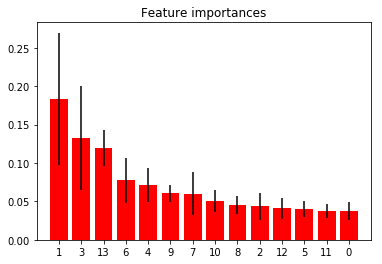

In [19]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]# Print the feature ranking
print("Feature ranking:")
for f in range(min(20,xtrain.shape[1])):    
    print("%2d) %-*s %f" % (f + 1, 30, xtrain.columns[indices[f]], importances[indices[f]]))# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(xtrain.shape[1]), importances[indices],  color="r", yerr=std[indices], align="center")
plt.xticks(range(xtrain.shape[1]), indices)
plt.xlim([-1, xtrain.shape[1]])
plt.show()

In [20]:
tuple(xtrain.columns[indices])

('渠道1时长',
 '渠道1消费',
 '与客服沟通次数',
 '渠道2消费',
 '渠道2时长',
 '渠道3消费',
 '渠道3时长',
 '渠道4时长',
 '渠道3访问次数',
 '渠道1访问次数',
 '渠道4消费',
 '渠道2访问次数',
 '渠道4访问次数',
 '业务1使用次数')

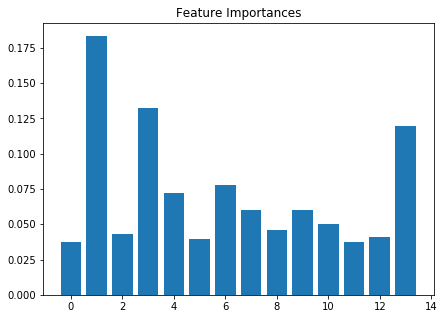

In [21]:
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
ax.set_title("Feature Importances")
plt.show()

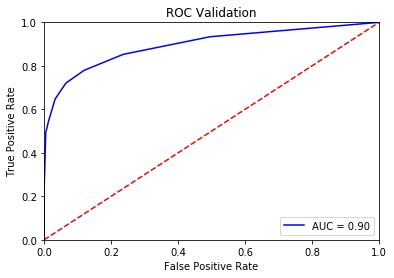

In [22]:
predictions_validation = rfc.predict_proba(xtest)[:,1]
fpr, tpr, _ = roc_curve(ytest, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 交叉验证

sklearn.model_selection.cross_val_score(estimator, X, y, scoring=None,
cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)


estimator:   估计方法对象(分类器)

X：        数据特征(Features)

y：        数据标签(Labels)

soring：    调用方法(包括accuracy和mean_squared_error等等)

cv：       几折交叉验证

n_jobs：   同时工作的cpu个数（-1代表全部）

In [23]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, xtrain, ytrain)
print(scores.mean())                             

clf2 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf2, xtrain, ytrain)
print(scores.mean())                             

C:\Users\reina\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\reina\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8589856841784863
0.8967035342356681


### 网格搜索选择最优超参数取值

In [24]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [25]:
param_test1 = {'n_estimators': range(25,500,25)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100, 
                                                           min_samples_leaf=20,
                                                           max_depth=8, random_state=10), 
                        param_grid = param_test1, 
                        scoring='roc_auc', 
                        cv=5)
gsearch1.fit(xtrain, ytrain)
print(gsearch1.best_params_, gsearch1.best_score_)
#gsearch1.cv_results_打印拟合结果)

{'n_estimators': 300} 0.8376467254535471


In [26]:
param_test2 = {'min_samples_split':range(60, 200, 20), 'min_samples_leaf':range(10, 110, 10)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=300,
                                                           max_depth=8, random_state=10), 
                        param_grid = param_test2, 
                        scoring='roc_auc',
                        cv=5)
gsearch2.fit(xtrain,ytrain)
print(gsearch2.best_params_, gsearch2.best_score_)

{'min_samples_leaf': 10, 'min_samples_split': 60} 0.8457901256625079


In [27]:
param_test3 = {'max_depth':range(3, 30, 2)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=300,
                                                           min_samples_split=60, 
                                                           min_samples_leaf=10,
                                                           random_state=10), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        cv=5)
gsearch3.fit(xtrain,ytrain)
print(gsearch3.best_params_, gsearch3.best_score_)

{'max_depth': 7} 0.8483144059119456


In [28]:
roc_auc_score(ytest, gsearch3.best_estimator_.predict_proba(xtest)[:,1])

0.9071946486928104

In [29]:
gsearch3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [30]:
param_test4 = {'criterion':['gini', 'entropy'], 'class_weight':[None, 'balanced']}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=300,
                                                           max_depth=7, 
                                                           min_samples_split=60, 
                                                           min_samples_leaf=10,
                                                           random_state=10), 
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        cv=5)
gsearch4.fit(xtrain,ytrain)
print(gsearch4.best_params_, gsearch4.best_score_)

{'class_weight': None, 'criterion': 'entropy'} 0.8487282683455074


In [31]:
roc_auc_score(ytest, gsearch4.best_estimator_.predict_proba(xtest)[:,1])

0.908275462962963